In [1]:
# %%
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %%
alphabet = ['A', 'T', 'G', 'C']

# %%
class BaseModel():
    def __init__(self):
        self.y_true = np.empty([])
        self.y_pred = np.empty([])
    
    def initialize_population(self, initial_phrase, population_size:int, phrase_length:int):
        """
        Initializes the population with random values
        """

        def generate_random_phrase(size, alphabet):
            # alphabet_size = len(alphabet)
            # return ''.join([alphabet[random.randint(0, alphabet_size - 1)] for i in range(size)])
            return ''.join(np.random.choice(alphabet, size))

        self.y_true = initial_phrase
        self.y_pred = np.array([generate_random_phrase(phrase_length, alphabet) for _ in range(population_size)])
    
    def fitness_function(self, y_true:str, y_pred:str):
        count = 0
        for i, letter in enumerate(y_true):
            if letter == y_pred[i]:
                count += 1
        
        count = count / len(y_true)
        return count

    def evaluate_fitness(self):
        """
        Returns the fitness for all values in the y_true and y_pred arrays
        """
        return np.array([self.fitness_function(self.y_true, y_pred) for y_pred in self.y_pred])

# %%
def select_n_best(phrases: np.ndarray, n: int, base_model: BaseModel) -> np.ndarray:
    """
    Select n best phrases based on the fitness function
    and return the indexes of the selected phrases.
    """
    base_model.y_pred = phrases
    fitness = base_model.evaluate_fitness()
    return np.argsort(fitness)[-n:]

def get_worse_index(phrase, target, phrases, base_model: BaseModel):
    worse_score = base_model.fitness_function(target, phrase)
    for i in range(0, len(phrases)):
        score = base_model.fitness_function(target, phrases[i])
        if score < worse_score:
            return i
    return None

def genetic_drift(phrases: np.ndarray, seed: int = 2024) -> np.ndarray:
    """
    Apply genetic drift by randomly sampling phrases.
    """
    np.random.seed(seed)
    return np.random.choice(phrases, len(phrases), replace=True)

def crossover(population:np.array, base_model: BaseModel=None) -> np.array:
    '''
    Recombinação \n
    Pegar m% das frases, selecionar aleatoriamente 2 frases e trocar um pedaço delas dado um crossoverpoint aleatório
    '''
    phrase_size = len(population[0])
    crossover_point = np.random.randint(1, phrase_size - 1)
    # Select parents based on best fitness
    index_phrase1, index_phrase2 = select_n_best(population, 2, base_model)

    phrase1 = population[index_phrase1]
    phrase2 = population[index_phrase2]

    new_phrase_1 = phrase1[:crossover_point] + phrase2[crossover_point:]
    new_phrase_2 = phrase2[:crossover_point] + phrase1[crossover_point:]

    return new_phrase_1, new_phrase_2

def selection(new_phrases, phrase, base_model: BaseModel):
    return max(new_phrases, key=lambda p: base_model.fitness_function(phrase, p))

# %%
def plot_graphs_and_describe(full_gens, m_list):
    d = {}

    for i in range(len(full_gens)):
        d[f"M{m_list[i]}"] = full_gens[i]

    df = pd.DataFrame(d)

    print(df.describe())

    df.boxplot()
    plt.xticks(rotation=45)
    plt.ylabel("Generations")
    plt.xlabel("Mutation rate")
    plt.show()

# %%
def select_parents(population, fitness):
    probabilities = fitness - fitness.min() + 1e-6
    probabilities /= probabilities.sum()
    return np.random.choice(population, size=len(population), p=probabilities)

# %%
def mutate(individual, u):
    individual = list(individual)
    for i in range(len(individual)):
        if random.random() < u:
            individual[i] = str(np.random.choice(alphabet))
    return ''.join(individual)



In [2]:
def selection(population, base_model: BaseModel, n=10):
    base_model.y_pred = population
    fitness = base_model.evaluate_fitness()
    return population[np.argsort(fitness)[-n:]]

Exp 0 finished in 43 gens
Exp 1 finished in 412 gens
Exp 2 finished in 285 gens
Exp 3 finished in 307 gens
Exp 4 finished in 182 gens
Exp 5 finished in 2067 gens
Exp 6 finished in 4639 gens
Exp 7 finished in 859 gens
Exp 8 finished in 1175 gens
Exp 9 finished in 2217 gens
Exp 10 finished in 1346 gens
Exp 11 finished in 929 gens
Exp 12 finished in 1746 gens
Exp 13 finished in 797 gens
Exp 14 finished in 93 gens
Exp 15 finished in 4070 gens
Exp 16 finished in 1322 gens
Exp 17 finished in 947 gens
Exp 18 finished in 701 gens
Exp 19 finished in 3041 gens
Exp 20 finished in 527 gens
Exp 21 finished in 787 gens
Exp 22 finished in 262 gens
Exp 23 finished in 244 gens
Exp 24 finished in 364 gens
Exp 25 finished in 326 gens
Exp 26 finished in 555 gens
Exp 27 finished in 550 gens
Exp 28 finished in 769 gens
Exp 29 finished in 140 gens
             M0.25
count    30.000000
mean   1056.733333
std    1137.255891
min      43.000000
25%     311.750000
50%     735.000000
75%    1285.250000
max    4639

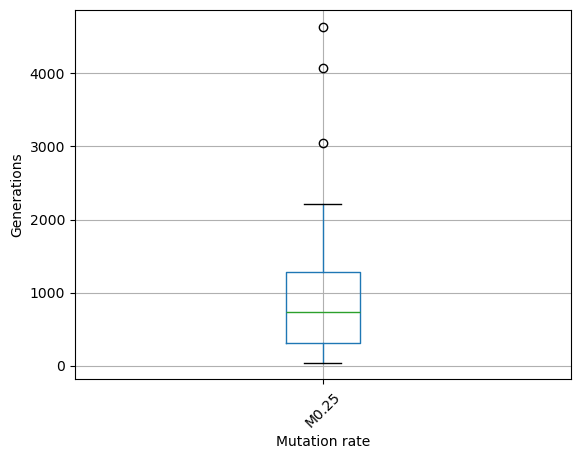

In [18]:
# %%
# 1st: 25.766667
phrase = 'GAGCCC'#GAACGAGCTTTGCGTCT'
n_phrases = 10
u = 0.25
m = 0.75
n_exp = 30
gen_max = 1e4
seed = 2024
debug = False
random.seed(seed)
np.random.seed(seed)

base_model = BaseModel()

target = phrase
gens = []
for exp in range(n_exp):
    base_model.initialize_population(target, n_phrases, len(phrase))
    fitness = base_model.evaluate_fitness()
    if debug:
        print("Phrases: ", base_model.y_pred)
        print("Phrases: ", base_model.y_true)
        print(fitness)

    phrase_size = len(phrase)
    gen = 0
    initial_population = base_model.y_pred
    population = initial_population.copy()
    for gen in range(int(gen_max)):
        if phrase in population:
            break
        
        if debug:
            print(f"Population {gen}: ", population)
            print(f"Population Fitness {gen}: ", [base_model.fitness_function(target, p) for p in population])
        # population = select_parents(population, fitness)
        
        for i in range(len(population)):
            if random.random() > m:
                population[i] = mutate(population[i], u)
                continue
            # Crossover
            new_phrase_1, new_phrase_2 = crossover(population, base_model)
            # population[i] = crossover(population, m)
            worse_index_1 = get_worse_index(new_phrase_1, target, population, base_model)
            worse_index_2 = get_worse_index(new_phrase_2, target, population, base_model)
            # Mutate
            if worse_index_1:
                population[worse_index_1] = mutate(new_phrase_1, u)
            if worse_index_2:
                population[worse_index_2] = mutate(new_phrase_2, u)
        
        # for i in range(len(population)):
        #     population[i] = mutate(population[i], u)

        population = selection(population, base_model, n=n_phrases)
        if debug:
            print(f"Population Post {gen}: ", population)
            print(f"Population Post Fitness {gen}: ", [base_model.fitness_function(target, p) for p in population])
    
    print(f"Exp {exp} finished in {gen} gens")
    gens.append(gen)

plot_graphs_and_describe([gens], [u])

In [ ]:
# %%
# 1st: 25.766667
phrase = 'GAGCCC'#GAACGAGCTTTGCGTCT'
n_phrases = 100
u = 0.25
m = 0.75
n_exp = 30
gen_max = 1e4
seed = 2024

random.seed(seed)
np.random.seed(seed)

target = phrase
gens = []
for exp in range(n_exp):
    
    base_model = BaseModel()
    base_model.initialize_population(target, n_phrases, len(phrase))
    fitness = base_model.evaluate_fitness()

    phrase_size = len(phrase)
    gen = 0
    initial_population = base_model.y_pred
    population = initial_population.copy()
    for gen in range(int(gen_max)):
        print(f"Generation {gen}")
        if phrase in population:
            print(f"Phrase found in generation {gen}")
            break
        
        # Selection
        # population = select_parents(population, fitness)
        population = selection(population, base_model, n=n_phrases)
        for i in range(len(population) // 2):
            if random.random() > m:
                continue
            # Crossover
            new_phrase_1, new_phrase_2 = crossover(population, base_model)
            # population[i] = crossover(population, m)
            worse_index_1 = get_worse_index(new_phrase_1, target, population, base_model)
            worse_index_2 = get_worse_index(new_phrase_2, target, population, base_model)
            # Mutate
            if worse_index_1:
                population[worse_index_1] = mutate(new_phrase_1, u)
            if worse_index_2:
                population[worse_index_2] = mutate(new_phrase_2, u)
            
    gens.append(gen)

mean_gen = sum(gens) / len(gens)
print(f"Mean generations: {mean_gen:,}")

plot_graphs_and_describe([gens], [u])

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generation 70
Generation 71
Ge

KeyboardInterrupt: 